## Demo of how nonparametric regression calibration works

## consider Z\~Uniform(0,1) and Y|Z\~N(Z+1, 1), we generate 300 points. We use the naive kernel, in which our method gives the empirical distribution based on samples from a neighborhood.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


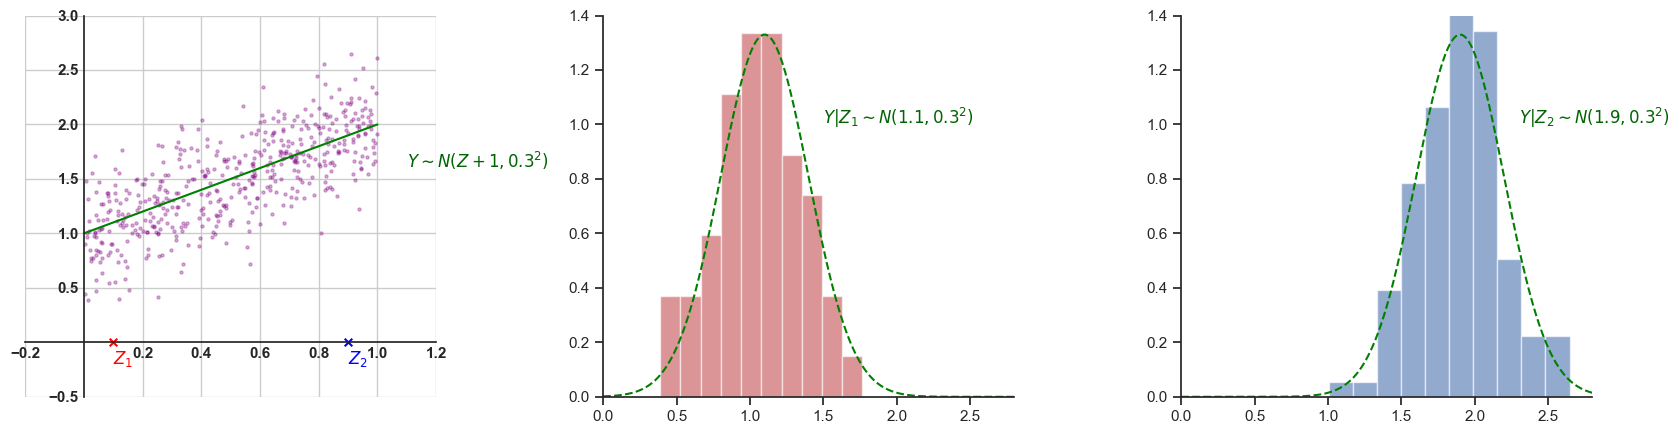

In [8]:
from utils import seed_all
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn
seaborn.set(style='ticks')



N = 500

seed_all(6)

Zs = np.random.uniform(0, 1, N)
Ys = np.random.normal(loc=Zs+1, scale=0.3, size=N)
helper_Z = np.linspace(0,1,500)

Z1 = 0.1
Z2 = 0.9


fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (17, 4.5))

ax.scatter(Zs, Ys, color='purple', s=5, marker='o', alpha = 0.3)
ax.plot(helper_Z, helper_Z+1, color='green')
ax.annotate(r'$Y\sim N(Z+1,0.3^2)$', (1.1, 2-0.4), color='darkgreen', fontweight='bold')


ax.scatter([Z1], [0], s=30, color='red', marker = 'x')
ax.annotate(r'$Z_1$', (Z1, -0.2), color='red', weight='bold')
ax.scatter([Z2], [0], s=30, color='blue', marker = 'x')
ax.annotate(r'$Z_2$', (Z2, -0.2), color='blue')


ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 3)

ax.grid(True)

seaborn.despine(ax=ax, offset=0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.yaxis.set_tick_params(size=0)
ax.set_yticks([t for t in ax.get_yticks() if t != 0])
ax.xaxis.set_tick_params(size=0)
ax.set_xticks([t for t in ax.get_xticks() if t != 0])
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    
    
ker_width = 0.1

Z1_samples = Ys[(Zs > Z1 - ker_width) & (Zs < Z1 + ker_width)]
Z2_samples = Ys[(Zs > Z2 - ker_width) & (Zs < Z2 + ker_width)]
    
    
    
ax2.hist(Z1_samples, bins=10, density=True, alpha=0.6, color='r', label="Histogram")
ax2.set_xlim(0, 2.8)
ax2.set_ylim(0, 1.4)
helper_Z2 = np.linspace(0,2.8,500)
ax2.plot(helper_Z2, norm.pdf(helper_Z2, Z1+1, 0.3), color='green', linestyle='--')
ax2.annotate(r'$Y|Z_1\sim N(1.1,0.3^2)$', (1.5, 1), color='darkgreen', fontweight='bold')
seaborn.despine(ax=ax2, offset=0)



ax3.hist(Z2_samples, bins=10, density=True, alpha=0.6, color='b', label="Histogram")
ax3.set_xlim(0, 2.8)
ax3.set_ylim(0, 1.4)
ax3.plot(helper_Z2, norm.pdf(helper_Z2, Z2+1, 0.3), color='green', linestyle='--')
ax3.annotate(r'$Y|Z_2\sim N(1.9,0.3^2)$', (2.3, 1), color='darkgreen', fontweight='bold')
seaborn.despine(ax=ax3, offset=0)



# Plotting the smooth curve denoting the underlying distribution

    


plt.tight_layout()
plt.savefig("demo.eps", dpi=200)